### Visualize Extracted Keypoints

#### cuerpo y manos

In [47]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# con pose 255 
# sin pose 126
# Function to visualize keypoints from a .npy file
def visualize_keypoints(npy_file):
    keypoints = np.load(npy_file)  # Load keypoints data
    num_frames = keypoints.shape[0]

    print(f"Visualizing {os.path.basename(npy_file)} ({num_frames} frames)")

    # Create a blank image for visualization
    img_size = 500
    blank_frame = np.ones((img_size, img_size, 3), dtype=np.uint8) * 255

    # Define landmarks (POSE = 33, HAND = 21 per hand)
    HAND_LANDMARKS = 21
    TOTAL_KEYPOINTS =  2 * HAND_LANDMARKS


    # Animate the keypoints frame by frame
    for frame_idx in range(num_frames):
        img = blank_frame.copy()
        frame_keypoints = keypoints[frame_idx]

        # Normalize & scale keypoints to fit the image
        scaled_keypoints = (frame_keypoints[:, :2] * img_size).astype(int)

        # Draw left hand landmarks
        for i in range(HAND_LANDMARKS):
            x, y = scaled_keypoints[i]
            cv2.circle(img, (x, y), 3, (126, 0, 0), -1)  # Blue for left hand

        # Draw right hand landmarks
        for i in range(HAND_LANDMARKS):
            x, y = scaled_keypoints[HAND_LANDMARKS + i]
            cv2.circle(img, (x, y), 3, (0, 126, 0), -1)  # Green for right hand

        # Show the frame
        cv2.imshow("Keypoints Visualization", img)
        if cv2.waitKey(50) & 0xFF == ord('q'):  # Press 'q' to quit
            break

    cv2.destroyAllWindows()
    print(" Visualization complete.")

In [ ]:
# Folder where keypoint files are stored
keypoints_folder = "../data/test/out/good"

# Get all .npy files for keypoints
npy_files = [f for f in os.listdir(keypoints_folder) if f.endswith(".npy")]

print(f"Found {len(npy_files)} keypoint files.")

visualize_keypoints(os.path.join(keypoints_folder, npy_files[0]))


Found 6 keypoint files.
Visualizing good_1_aug4.npy (98 frames)
 Visualization complete.


#### solo manos

In [18]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to visualize keypoints from a .npy file
def visualize_keypoints_hands(npy_file):
    keypoints = np.load(npy_file)  # Load keypoints data
    num_frames = keypoints.shape[0]

    print(f"Visualizing {os.path.basename(npy_file)} ({num_frames} frames)")

    # Create a blank image for visualization
    img_size = 500
    blank_frame = np.ones((img_size, img_size, 3), dtype=np.uint8) * 255

    # Define landmarks (POSE = 33, HAND = 21 per hand)
    POSE_LANDMARKS = 33
    HAND_LANDMARKS = 21
    TOTAL_KEYPOINTS = 2 * HAND_LANDMARKS


    # Animate the keypoints frame by frame
    for frame_idx in range(num_frames):
        img = blank_frame.copy()
        frame_keypoints = keypoints[frame_idx]

        # Normalize & scale keypoints to fit the image
        scaled_keypoints = (frame_keypoints[:, :2] * img_size).astype(int)

        # Draw left hand landmarks
        for i in range(HAND_LANDMARKS):
            x, y = scaled_keypoints[i]
            cv2.circle(img, (x, y), 3, (255, 0, 0), -1)  # Blue for left hand

        # Draw right hand landmarks
        for i in range(HAND_LANDMARKS):
            x, y = scaled_keypoints[HAND_LANDMARKS + i]
            cv2.circle(img, (x, y), 3, (0, 255, 0), -1)  # Green for right hand

        # Show the frame
        cv2.imshow("Keypoints Visualization", img)
        if cv2.waitKey(50) & 0xFF == ord('q'):  # Press 'q' to quit
            break

    cv2.destroyAllWindows()
    print(" Visualization complete.")

In [ ]:
keypoints_folder = "../data/keypoints/good"

# Get all .npy files for keypoints
npy_files = [f for f in os.listdir(keypoints_folder) if f.endswith(".npy")]

print(f"Found {len(npy_files)} keypoint files.")

visualize_keypoints_hands(os.path.join(keypoints_folder, npy_files[10]))


Found 60 keypoint files.
Visualizing good_27.npy (81 frames)
 Visualization complete.


In [ ]:
#keypoints_folder = "../data/keypoints_augmented/good"
keypoints_folder = "../data/test/out/good"

# Get all .npy files for keypoints
npy_files = [f for f in os.listdir(keypoints_folder) if f.endswith(".npy")]

print(f"Found {len(npy_files)} keypoint files.")

visualize_keypoints_hands(os.path.join(keypoints_folder, npy_files[1]))


Found 6 keypoint files.
Visualizing good_1_aug3.npy (98 frames)
 Visualization complete.


In [69]:
#forzar salida de la visualizacion
cv2.waitKey(1)
cv2.destroyAllWindows()

## Proporcion de manos y duracion en cada signo

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from shared_elements.shared_utils import compute_hand_fractions

# Configuración de rutas y signos
DATA_FOLDER = '../data/keypoints_fixed'
META_FOLDER = '../data/keypoints_metadata'
signs = ['hello', 'bye', 'world', 'thank_you', 'yes', 'no', 'please',
         'sorry', 'good', 'bad', 'me', 'you', 'love', 'help', 'stop']

# Cálculo de métricas por signo
mean_left = []
mean_right = []
mean_duration = []

for sign in signs:
    seq_dir = os.path.join(DATA_FOLDER, sign)
    meta_dir = os.path.join(META_FOLDER, sign)
    left_fracs = []
    right_fracs = []
    durations = []
    
    for fn in os.listdir(seq_dir):
        if not fn.endswith('.npy'):
            continue
        # Cargar secuencia fijada
        seq = np.load(os.path.join(seq_dir, fn))
        # Calcular fracción de cada mano
        lf, rf = compute_hand_fractions(seq)
        left_fracs.append(lf)
        right_fracs.append(rf)
        # Leer duración original
        meta_path = os.path.join(meta_dir, fn.replace('.npy', '.json'))
        with open(meta_path, 'r') as f:
            meta = json.load(f)
        durations.append(meta['duration'])
    
    mean_left.append(np.mean(left_fracs))
    mean_right.append(np.mean(right_fracs))
    mean_duration.append(np.mean(durations))

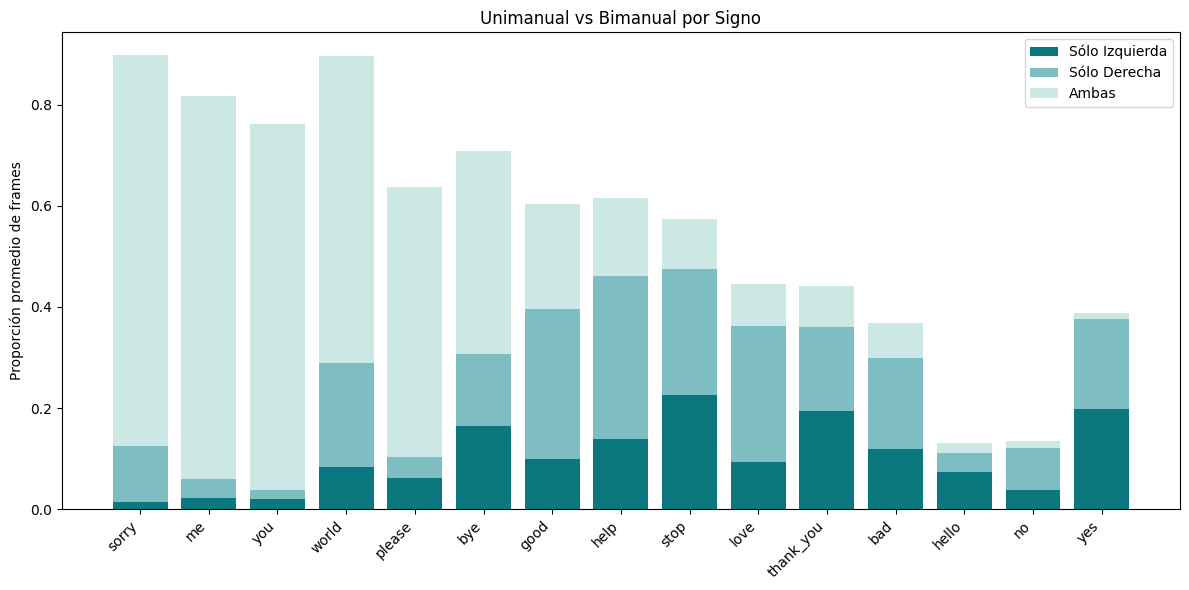

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
def frame_speeds(seq: np.ndarray) -> np.ndarray:
    """
    Calcula la velocidad frame a frame para cada mano por separado.
    seq: array (T, 42, 3)
    Devuelve speeds_left, speeds_right de shape (T-1,)
    """
    # diferencias entre frames
    diffs = seq[1:] - seq[:-1]                      # (T-1, 42, 3)
    # aplanar mano izquierda y derecha
    left_diff  = diffs[:, :21, :]                   # (T-1, 21, 3)
    right_diff = diffs[:, 21:, :]                   # (T-1, 21, 3)
    # norma L2 por key-point y sumar
    speeds_left  = np.linalg.norm(left_diff,  axis=2).sum(axis=1)  # (T-1,)
    speeds_right = np.linalg.norm(right_diff, axis=2).sum(axis=1)
    return speeds_left, speeds_right



# calculamos por signo las medias de left_only, right_only, both
per_sign_stats = {s: {'left_only': [], 'right_only': [], 'both': []} for s in signs}

for sign in signs:
    folder = os.path.join(DATA_FOLDER, sign)
    for fname in os.listdir(folder):
        if not fname.endswith('.npy'): continue
        seq = np.load(os.path.join(folder, fname))  # (T,42,3)
        # calcula velocidades y presencia
        speeds_l, speeds_r = frame_speeds(seq)  # shape (T-1,)
        thr_l = 0.1 * speeds_l.max() if speeds_l.size else 0
        thr_r = 0.1 * speeds_r.max() if speeds_r.size else 0

        # presencia y movimiento
        present_l = np.any(seq[:-1,:21,:2]!=0, axis=(1,2))
        present_r = np.any(seq[:-1,21:,:2]!=0, axis=(1,2))
        active_l  = present_l & (speeds_l>thr_l)
        active_r  = present_r & (speeds_r>thr_r)

        # frame a frame: exclusivas / ambas
        left_only  = np.logical_and( active_l,  ~active_r)
        right_only = np.logical_and(~active_l,   active_r)
        both        = np.logical_and( active_l,   active_r)

        # proporciones
        total = len(active_l)
        per_sign_stats[sign]['left_only'].append(  left_only.sum()/total )
        per_sign_stats[sign]['right_only'].append( right_only.sum()/total )
        per_sign_stats[sign]['both'].append(        both.sum()/total )

# medias
labels = []
left_means, right_means, both_means = [], [], []
for s in signs:
    labels.append(s)
    stats = per_sign_stats[s]
    left_means .append(np.mean(stats['left_only']))
    right_means.append(np.mean(stats['right_only']))
    both_means .append(np.mean(stats['both']))

# ordenamos por proporción bimanual desc
order = np.argsort(both_means)[::-1]
labels     = [labels[i]     for i in order]
left_means = np.array(left_means)[order]
right_means= np.array(right_means)[order]
both_means = np.array(both_means)[order]

# grafico
x = np.arange(len(labels))
plt.figure(figsize=(12,6))
plt.bar(x, left_means,    label='Sólo Izquierda', color='#0b7880')
plt.bar(x, right_means,   bottom=left_means, label='Sólo Derecha', color= '#7ebdc1')
plt.bar(x, both_means,    bottom=left_means+right_means, label='Ambas', color='#CCE8E4')

plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Proporción promedio de frames')
plt.title('Unimanual vs Bimanual por Signo')
plt.legend()
plt.tight_layout()
plt.show()


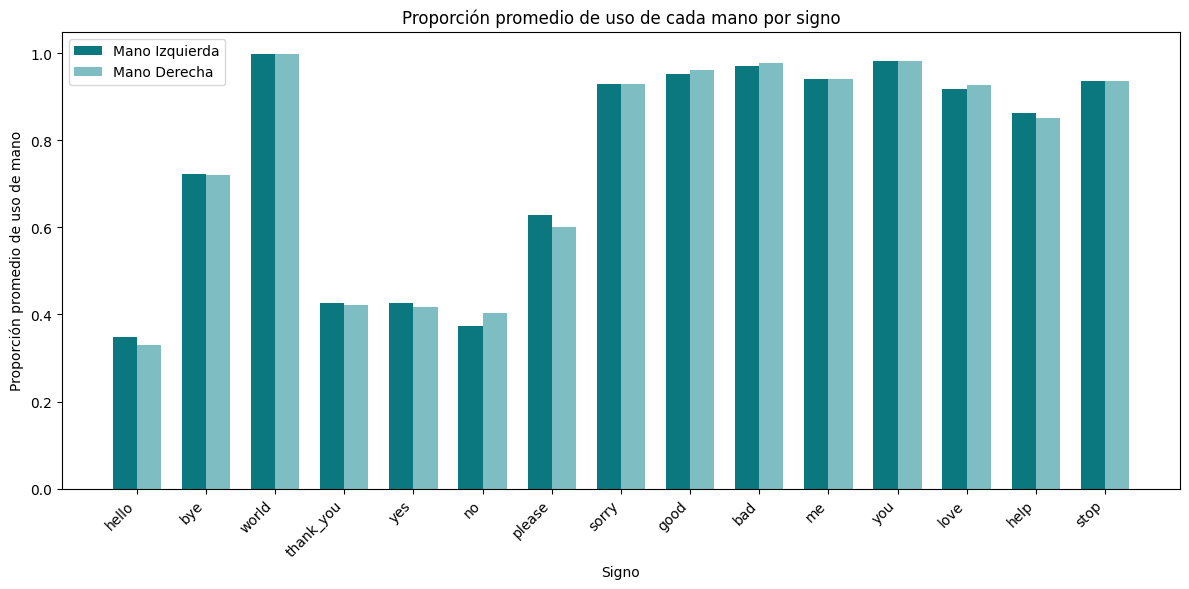

In [15]:
# Gráfico 1: Proporción de manos por signo
plt.figure(figsize=(12, 6))
x = np.arange(len(signs))
width = 0.35
plt.bar(x - width/2, mean_left, width, label='Mano Izquierda', color='#0b7880')
plt.bar(x + width/2, mean_right, width, label='Mano Derecha', color='#7ebdc1')
plt.xticks(x, signs, rotation=45, ha='right')
plt.xlabel('Signo')
plt.ylabel('Proporción promedio de uso de mano')
plt.title('Proporción promedio de uso de cada mano por signo')
plt.legend()
plt.tight_layout()
plt.show()

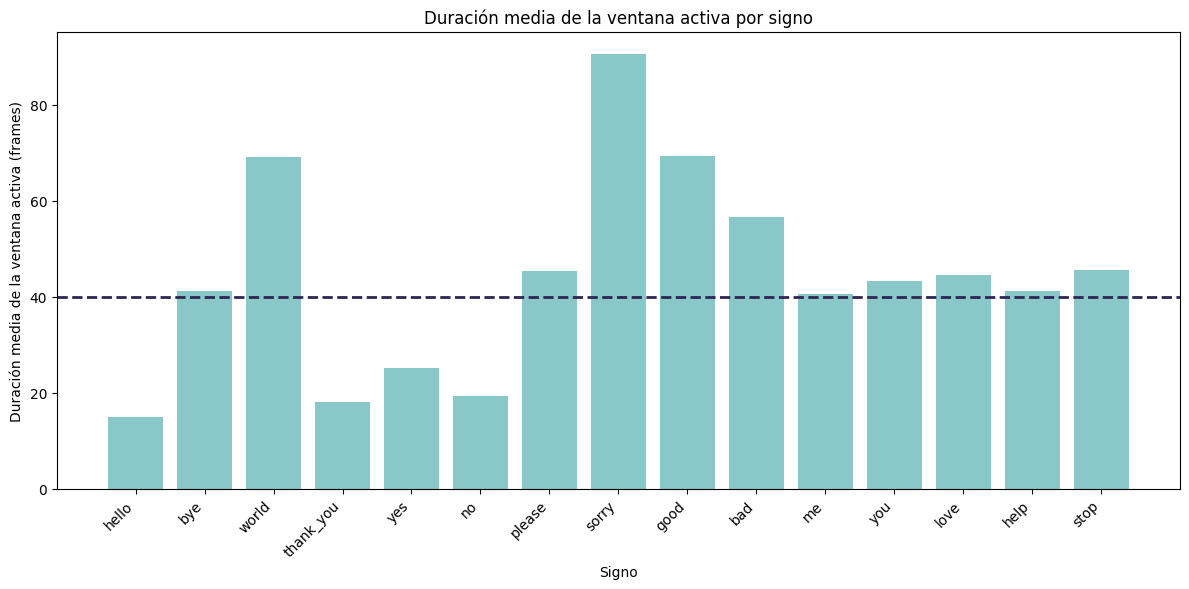

In [17]:
# Gráfico 2: Duración media de ventana activa por signo
plt.figure(figsize=(12, 6))
plt.bar(signs, mean_duration, color='#89c7c9')
plt.xticks(rotation=45, ha='right')
plt.axhline(40, color='#2b2653', linestyle='--', linewidth=2, label='Límite = 40 frames')
plt.xlabel('Signo')
plt.ylabel('Duración media de la ventana activa (frames)')
plt.title('Duración media de la ventana activa por signo')
plt.tight_layout()
plt.show()

## Deteccion de la ventana activa 

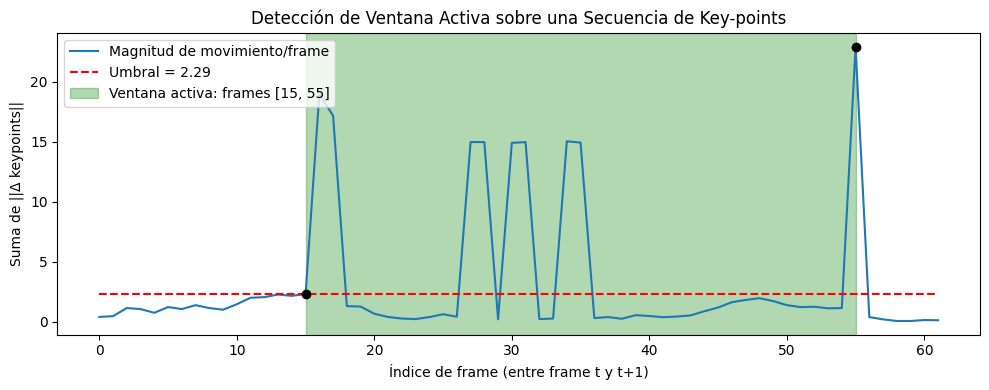

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def detect_active_window_with_speeds(seq: np.ndarray,
                                     threshold_ratio: float = 0.1):
    """
    Dada una secuencia (T, K, 3), detecta inicio y fin del tramo con movimiento.
    Además devuelve:
      - speeds: array (T-1,) con la suma de normas L2 por frame
      - thr: umbral absoluto usado para cortar
    """
    T = seq.shape[0]
    if T < 2:
        return 0, T-1, T, np.zeros(0), 0.0

    # 1) calcular velocidades frame a frame
    diffs = np.linalg.norm(seq[1:] - seq[:-1], axis=2)  # (T-1, K)
    speeds = diffs.sum(axis=1)                         # (T-1,)

    # umbral
    thr = (threshold_ratio * speeds.max()) if speeds.size else 0.0

    # región activa
    active = np.where(speeds > thr)[0]
    if active.size == 0:
        t0, t1 = 0, T-1
    else:
        t0 = int(active[0])
        t1 = int(active[-1] + 1)  # +1 por el shift en speeds

    duration = t1 - t0 + 1
    return t0, t1, duration, speeds, thr



example_seq_path = "../data/keypoints/love/love_1.npy"
seq = np.load(example_seq_path)  # forma (T, K, 3)

t0, t1, duration, speeds, thr = detect_active_window_with_speeds(seq, threshold_ratio=0.1)

frames = np.arange(speeds.shape[0])

plt.figure(figsize=(10,4))
plt.plot(frames, speeds, label='Magnitud de movimiento/frame')
plt.hlines(thr, frames.min(), frames.max(),
           colors='r', linestyles='--',
           label=f'Umbral = {thr:.2f}')

plt.axvspan(t0, t1-1, color='green', alpha=0.3,
            label=f'Ventana activa: frames [{t0}, {t1-1}]')

plt.scatter([t0, t1-1], [speeds[t0], speeds[t1-1]],
            color='k', zorder=5)

plt.title('Detección de Ventana Activa sobre una Secuencia de Key-points')
plt.xlabel('Índice de frame (entre frame t y t+1)')
plt.ylabel('Suma de ||Δ keypoints||')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
